* 데이터 수집      
https://data.seoul.go.kr/dataList/5/literacyView.do

In [1]:
import pandas as pd

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 확인 및 전처리

## 2021년 공공자전거 대여이력 정보

### 데이터프레임 생성/확인

In [3]:
df1 = pd.read_csv('data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)
df7 = pd.read_csv('data/공공자전거 대여이력 정보_2021.07.csv', encoding='cp949', low_memory=False)
df8 = pd.read_csv('data/공공자전거 대여이력 정보_2021.08.csv', encoding='cp949', low_memory=False)
df9 = pd.read_csv('data/공공자전거 대여이력 정보_2021.09.csv', encoding='cp949', low_memory=False)
df10= pd.read_csv('data/공공자전거 대여이력 정보_2021.10.csv', encoding='cp949', low_memory=False)
df11= pd.read_csv('data/공공자전거 대여이력 정보_2021.11.csv', encoding='cp949', low_memory=False)
df12= pd.read_csv('data/공공자전거 대여이력 정보_2021.12.csv', encoding='cp949', low_memory=False)

In [4]:
df1.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.0


### 데이터 연결/확인
* concat

In [5]:
# concat
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [6]:
# head
df.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0


In [7]:
#tail
df.tail(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
1704296,SPB-53564,2021-12-22 14:38:04,99999,영남단말기정비,0,2021-12-22 14:39:29,9998,영남주차장 정비센터,0,1.0,0.0


In [8]:
# 데이터 크기
df.shape

(30788945, 11)

In [9]:
# 데이터 정보(사용메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30788945 entries, 0 to 1704296
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.8+ GB


## 데이터 전처리

### 불필요한 컬럼 제거

In [10]:
# 자전거번호, 대여거치대, 반납거치대 제거
df.drop(columns=['자전거번호', '대여거치대', '반납거치대'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30788945 entries, 0 to 1704296
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.1+ GB


### 자료형 확인/변경

In [12]:
# 자료형 확인
df.dtypes

대여일시         object
대여 대여소번호      int64
대여 대여소명      object
반납일시         object
반납대여소번호      object
반납대여소명       object
이용시간        float64
이용거리        float64
dtype: object

In [13]:
# 카테고리형으로 변경  :    대여 대여소번호, 반납대여소번호
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [14]:
df.dtypes

대여일시          object
대여 대여소번호    category
대여 대여소명       object
반납일시          object
반납대여소번호     category
반납대여소명        object
이용시간         float64
이용거리         float64
dtype: object

In [15]:
# 메모리 용량 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30788945 entries, 0 to 1704296
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 1.7+ GB


In [16]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05
...,...,...,...,...,...,...,...,...
1704292,2021-12-30 09:39:45,9999,상담센터,2021-12-30 09:52:44,346,맥스타일 앞,12.0,0.00
1704293,2021-12-30 18:55:31,9999,상담센터,2021-12-30 18:59:04,1986,태평양물산빌딩,3.0,0.00
1704294,2021-12-30 21:12:40,9999,상담센터,2021-12-30 21:15:54,188,홍은동 정원여중 입구,3.0,345.45
1704295,2021-12-22 09:46:16,88888,영남배송,2021-12-22 10:03:24,236,문래동자이아파트 앞,17.0,0.00


In [17]:
# datetime형으로 변경 : 대여일시,반납일시
df['대여일시'] = pd.to_datetime(df['대여일시'])

In [18]:
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')

In [19]:
# 자료형 변경 확인
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

## 결측치 확인/처리

In [20]:
# 결측치 확인
df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        123
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [21]:
# 결측치 제거
df.dropna(inplace=True)

In [22]:
# 결측치 확인
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 일별 이용 현황

## 대여날짜 컬럼 추가
* date

In [23]:
df['대여날짜'] = df['대여일시'].dt.date

In [24]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18
...,...,...,...,...,...,...,...,...,...
1704292,2021-12-30 09:39:45,9999,상담센터,2021-12-30 09:52:44,346,맥스타일 앞,12.0,0.00,2021-12-30
1704293,2021-12-30 18:55:31,9999,상담센터,2021-12-30 18:59:04,1986,태평양물산빌딩,3.0,0.00,2021-12-30
1704294,2021-12-30 21:12:40,9999,상담센터,2021-12-30 21:15:54,188,홍은동 정원여중 입구,3.0,345.45,2021-12-30
1704295,2021-12-22 09:46:16,88888,영남배송,2021-12-22 10:03:24,236,문래동자이아파트 앞,17.0,0.00,2021-12-22


## 대여날짜 별 대여 건수
* groupby
* to_frame

In [25]:
# 대여날짜 별 대여건수 추출
df_count = df.groupby('대여날짜').대여일시.count().to_frame()

In [26]:
# 대여날짜 별 대여건수 시각화
df_count.columns=['대여건수']

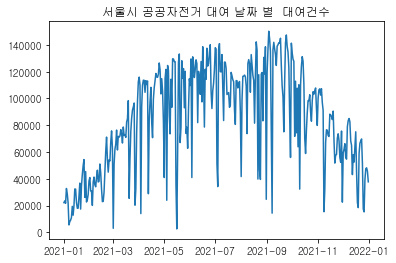

In [27]:
plt.plot(df_count.index, df_count.values)
plt.title('서울시 공공자전거 대여 날짜 별  대여건수')
plt.show()

## 대여날짜 별 이용시간
* groupby
* to_frame

In [28]:
# 대여날짜 별 이용시간 추출
df_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()

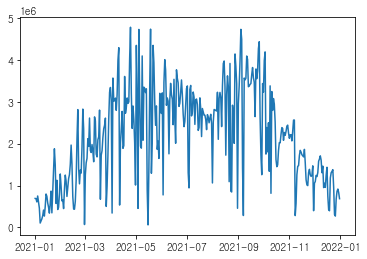

In [29]:
# 대여날짜 별 이용시간 시각화
plt.plot(df_time.index, df_time['이용시간'])
plt.show()

## 대여날짜 별 이용 거리

In [30]:
# 대여날짜 별 이용거리 추출
df_distance = df.groupby('대여날짜')['이용거리'].sum().to_frame()

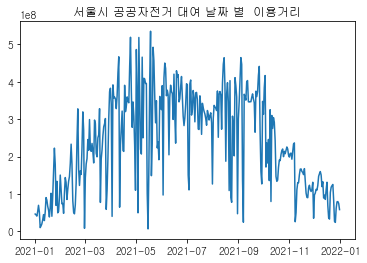

In [31]:
# 대여날짜 별 이용거리 시각화
plt.plot(df_distance.index, df_distance['이용거리'])
plt.title('서울시 공공자전거 대여 날짜 별  이용거리')
plt.show()

## 데이터프레임 합치기

In [32]:
df_date = pd.concat([df_time, df_distance, df_count], axis=1)
df_date

,이용시간,이용거리,대여건수
대여날짜,,,
2021-01-01,692309.0,46135287.75,22119
2021-01-02,686580.0,44096180.54,23463
2021-01-03,609571.0,40598300.28,21656
2021-01-04,750721.0,52496452.32,32732
2021-01-05,610227.0,69448557.10,28819
...,...,...,...
2021-12-27,680549.0,61733083.98,39337
2021-12-28,861946.0,78802415.20,47483
2021-12-29,916195.0,79438671.91,48169


# 시간대별 대여/반납 현황

## 대여시간, 반납시간 컬럼 추가

In [33]:
df['대여시간'] = df['대여일시'].dt.hour

In [34]:
df['반납시간'] = df['반납일시'].dt.hour

In [35]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
대여시간                 int64
반납시간                 int64
dtype: object

## 시간대별 대여/반납 현황

In [36]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18
...,...,...,...,...,...,...,...,...,...,...,...
1704292,2021-12-30 09:39:45,9999,상담센터,2021-12-30 09:52:44,346,맥스타일 앞,12.0,0.00,2021-12-30,9,9
1704293,2021-12-30 18:55:31,9999,상담센터,2021-12-30 18:59:04,1986,태평양물산빌딩,3.0,0.00,2021-12-30,18,18
1704294,2021-12-30 21:12:40,9999,상담센터,2021-12-30 21:15:54,188,홍은동 정원여중 입구,3.0,345.45,2021-12-30,21,21
1704295,2021-12-22 09:46:16,88888,영남배송,2021-12-22 10:03:24,236,문래동자이아파트 앞,17.0,0.00,2021-12-22,9,10


In [37]:
# 시간대별 대여현황
s_rental = df['대여시간'].value_counts()
s_rental

18    3172809
17    2552630
19    2262567
16    1987377
20    1945186
8     1887780
21    1840202
15    1704683
22    1541040
14    1527708
13    1433299
12    1380481
11    1221619
9     1182205
7     1147875
10    1023595
23     813047
0      567807
6      476391
1      367309
2      237068
5      220788
3      160569
4      134641
Name: 대여시간, dtype: int64

In [38]:
# 시간대별 반납현황
s_return = df['반납시간'].value_counts()
s_return

18    3129965
19    2494717
17    2346090
20    1999660
21    1922637
8     1903913
16    1860139
22    1836586
15    1584171
14    1417294
13    1383657
12    1336984
9     1182580
11    1093881
23    1065786
10     958626
7      942739
0      686193
1      445287
6      388645
2      289818
5      189387
3      186504
4      143417
Name: 반납시간, dtype: int64

## 시각화

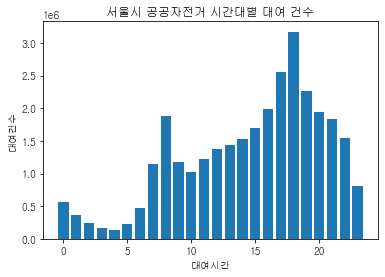

In [39]:
# 시간대별 공공자전거 대여건수 시각화
s_rental = s_rental.sort_index()
s_rental
x = s_rental.index
y = s_rental.values
plt.bar(x,y)
plt.title('서울시 공공자전거 시간대별 대여 건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

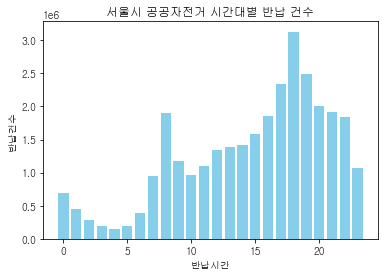

In [40]:
# 시간대별 공공자전거 반납건수 시각화
s_return = s_return.sort_index()
s_return
x = s_return.index
y = s_return.values
plt.bar(x,y,color='skyblue')
plt.title('서울시 공공자전거 시간대별 반납 건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')
plt.show()

# 대여소별 대여/반납 현황

## 대여소 현황

In [41]:
# 대여 대여소번호 갯수
df['대여 대여소번호']

0              3
1              3
2              3
3              3
4              3
           ...  
1704292     9999
1704293     9999
1704294     9999
1704295    88888
1704296    99999
Name: 대여 대여소번호, Length: 30788676, dtype: category
Categories (2508, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [42]:
# 반납대여소번호 갯수
df['반납대여소번호']

0           668
1           668
2           668
3           668
4           540
           ... 
1704292     346
1704293    1986
1704294     188
1704295     236
1704296    9998
Name: 반납대여소번호, Length: 30788676, dtype: category
Categories (5128, object): [3, 5, 10, 101, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [43]:
# 반납대여소 번호 처리 (str형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('str')

In [44]:
# 반납대여소 번호 처리 (왼쪽의 '0' 제거)
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip('0')

In [45]:
# 반납대여소 번호 처리 (int형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('int')

In [46]:
# 반납대여소 번호 처리 (category형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [47]:
df['반납대여소번호']

0           668
1           668
2           668
3           668
4           540
           ... 
1704292     346
1704293    1986
1704294     188
1704295     236
1704296    9998
Name: 반납대여소번호, Length: 30788676, dtype: category
Categories (2509, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

## 대여건수가 가장 많은 대여소 best10

In [48]:
# value_counts
df[['대여 대여소번호', '대여 대여소명']].value_counts()[:10].to_frame()

,,0
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,135294
502,뚝섬유원지역 1번출구 앞,134516
2715,마곡나루역 2번 출구,94020
2102,봉림교 교통섬,89483
1210,롯데월드타워(잠실역2번출구 쪽),82798
2177,신대방역 2번 출구,72955
152,마포구민체육센터 앞,69960
1153,"발산역 1번, 9번 인근 대여소",67631
247,당산역 10번출구 앞,65587


## 반납건수가 가장 많은 대여소 best10

In [49]:
# value_counts
df[['반납대여소번호', '반납대여소명']].value_counts()[:10].to_frame()

,,0
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,152322
207,여의나루역 1번출구 앞,132500
2715,마곡나루역 2번 출구,93481
2102,봉림교 교통섬,91554
1210,롯데월드타워(잠실역2번출구 쪽),83077
152,마포구민체육센터 앞,80015
2177,신대방역 2번 출구,76714
272,당산육갑문,70805
583,청계천 생태교실 앞,69693


## 여의나루역 1번출구 앞 대여소 이용현황

### 서브셋 만들기

In [50]:
df_207 = df[df['대여 대여소번호']==207]
df_207.head(1)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.0,2021-01-01,1,1


### 반납 현황

In [52]:
# value_counts
df_207[['반납대여소번호', '반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,33947
202,국민일보 앞,4616
249,여의도중학교 옆,2628
222,시범아파트버스정류장 옆,2548
272,당산육갑문,2357
...,...,...
2382,역삼동 sk뷰 501동앞,1
2381,언주역 6번출구앞,1
2376,수서역 6번출구 앞,1


### 요일별 대여현황

In [55]:
#요일컬럼 추가 : strftime('%a')
df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')

C:\Users\topbl\AppData\Local\Temp/ipykernel_23696/3551549941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


In [57]:
# value_counts
df_207['대여요일'].value_counts()

Sun    26114
Sat    23560
Fri    19153
Wed    18901
Mon    16986
Thu    16642
Tue    13939
Name: 대여요일, dtype: int64

### 이용시간 통계

In [58]:
# 이용시간 평균
df_207['이용시간'].mean()

48.36047156214199

In [59]:
# 이용시간 최대
df_207['이용시간'].max()

1268.0

In [60]:
# 이용시간 최소
df_207['이용시간'].min()

1.0

In [61]:
# 전체데이터 이용시간 평균
df['이용시간'].mean()

25.70872333061675